<a href="https://colab.research.google.com/github/Daksh-Raghuvanshi/Machine-Learnig-Projects/blob/main/CIFAR_10_Project_(4)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import torch
import torch.nn as nn
import torchvision
from torch.autograd import Variable
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
import torch.nn.functional as F

In [ ]:
# Prepare Dataset
# load data
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0, 0, 0), (1, 1, 1))])

batch_size =8

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


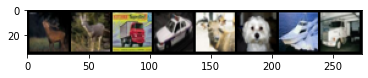

deer  deer  truck car   deer  dog   ship  truck


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
#### start code here ####
# set the device on which the model will be trained
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#### end code here ####
print(device)

cuda:0


In [ ]:
Num_Classes=10

In [ ]:
class CNN_Model1(nn.Module): 
    def __init__(self):
        super(CNN_Model1, self).__init__()
        self.CNN1=nn.Conv2d(3,32,kernel_size=(2,2))# Input size 32*32
        self.CNN2=nn.Conv2d(32,64,kernel_size=(2,2))
        self.CNN3=nn.Conv2d(64,128,kernel_size=(2,2))
        self.CNN4=nn.Conv2d(128,256,kernel_size=(2,2))
        self.CNN5=nn.Conv2d(256,512,kernel_size=(1,1))
        self.MP1=nn.MaxPool2d(kernel_size=2)
        self.MP2=nn.MaxPool2d(kernel_size=2)
        self.MP3=nn.MaxPool2d(kernel_size=2)
        self.MP4=nn.MaxPool2d(kernel_size=2)
        self.MP5=nn.MaxPool2d(kernel_size=2)
        self.MP6=nn.MaxPool2d(kernel_size=2)
        self.fc1=nn.Linear(512,2048)
        self.fc2=nn.Linear(2048,512)
        # 8x512 and 18432x2048
        self.fc3=nn.Linear(512,Num_Classes)
    def forward(self,Input):
        x1=self.CNN1(Input)
        x1=F.relu(x1)
        x2=self.MP1(x1)
        x3=self.CNN2(x2)
        x3=F.relu(x3)
        x4=self.MP2(x3)
        x5=self.CNN3(x4)
        x5=F.relu(x5)
        x6=self.MP1(x5)
        x7=self.CNN4(x6)
        x7=F.relu(x7)
        x8=self.MP1(x7)
        x9=self.CNN5(x8)
        x9=F.relu(x9)
        # x10=self.MP1(x9)

        x11=torch.flatten(x9, start_dim=1)
        # print(x11.shape)
        x12=self.fc1(x11)
        x13=self.fc2(x12)
        x14=self.fc3(x13)
        return x14 

In [ ]:
Model1=CNN_Model1().to(device)

In [ ]:
Model1

CNN_Model1(
  (CNN1): Conv2d(3, 32, kernel_size=(2, 2), stride=(1, 1))
  (CNN2): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
  (CNN3): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1))
  (CNN4): Conv2d(128, 256, kernel_size=(2, 2), stride=(1, 1))
  (CNN5): Conv2d(256, 512, kernel_size=(1, 1), stride=(1, 1))
  (MP1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (MP2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (MP3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (MP4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (MP5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (MP6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias

In [ ]:
pytorch_total_params = sum(p.numel() for p in Model1.parameters() if p.requires_grad)
print("number of parameters/weights ", pytorch_total_params)

number of parameters/weights  2409322


In [ ]:
error = nn.CrossEntropyLoss()

In [ ]:
learning_rate = 0.003
optimizer = torch.optim.Adagrad(Model1.parameters(),lr=learning_rate)

In [ ]:
from tqdm.notebook import tqdm
#### start code here ####
num_epochs = 10
#### end code here ####\\
loss_list = []
accuracy_list = []
counter1 = 0
for epoch in tqdm(range(num_epochs)):
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(trainloader): # 4

        #### start code here ####
        # load the dataset into device
        images = Variable(images).to(device)
        labels=Variable(labels).to(device)
        # Forward propagation 
        outputs = Model1(images)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs,labels)
        
        # Calculating gradients (1 line)
        loss.backward()
        
        # Update parameters (1 line)
        optimizer.step()
        counter1 += 1

        # Clear gradients (1 line)
        optimizer.zero_grad()
        #### end code here ####

        # Calculate Accuracy         
        predicted = torch.max(outputs.data, 1)[1] 
        
        # Total number of label
        total += len(labels)

        # Total correct prredictions
        correct += (predicted == labels).sum().to("cpu")

    accuracy = 100 * correct / float(total)
        
    # store loss and iterates
    loss_list.append(loss.data)
    accuracy_list.append(accuracy)
    print('Counter: ')
    counter1

    print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(epoch, loss.data, accuracy))

  0%|          | 0/10 [00:00<?, ?it/s]

Counter: 
Iteration: 0  Loss: 1.2054189443588257  Accuracy: 37.70000076293945 %
Counter: 
Iteration: 1  Loss: 1.2317941188812256  Accuracy: 48.79399871826172 %
Counter: 
Iteration: 2  Loss: 0.8808538913726807  Accuracy: 52.91600036621094 %
Counter: 
Iteration: 3  Loss: 1.2719240188598633  Accuracy: 55.742000579833984 %
Counter: 
Iteration: 4  Loss: 1.4693152904510498  Accuracy: 57.95800018310547 %
Counter: 
Iteration: 5  Loss: 0.6731045246124268  Accuracy: 59.73400115966797 %
Counter: 
Iteration: 6  Loss: 1.5813127756118774  Accuracy: 61.321998596191406 %
Counter: 
Iteration: 7  Loss: 0.8983297348022461  Accuracy: 62.731998443603516 %
Counter: 
Iteration: 8  Loss: 1.068753957748413  Accuracy: 63.94200134277344 %
Counter: 
Iteration: 9  Loss: 1.1707755327224731  Accuracy: 65.1760025024414 %


In [ ]:
loss_list2=[]
for item in list(loss_list):
  # print(item.item())
  loss_list2.append(item.item())


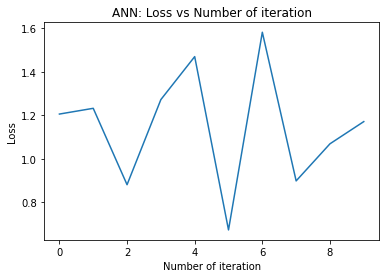

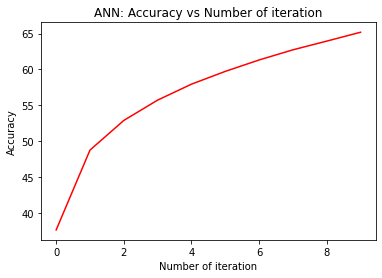

In [ ]:
# visualization loss 
plt.plot(range(num_epochs),loss_list2)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(range(num_epochs),accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        outputs = Model1(images)
        _, predictions = torch.max(outputs, 1)
        predictions = predictions.to("cpu")
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

score = 0

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    score = score + accuracy
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 61.9 %
Accuracy for class: car   is 67.1 %
Accuracy for class: bird  is 39.3 %
Accuracy for class: cat   is 38.7 %
Accuracy for class: deer  is 47.4 %
Accuracy for class: dog   is 46.6 %
Accuracy for class: frog  is 85.0 %
Accuracy for class: horse is 66.2 %
Accuracy for class: ship  is 70.9 %
Accuracy for class: truck is 78.8 %


In [ ]:
# model2

In [ ]:
#  Architecture of Second Sub-Network 
#Input-->CNN1-->MP1-->CNN3       
#Input-->CNN2-->MP2-->CNN3-->MP3-->CNN4-->MP4-->CNN5-->MP5-->FC1-->FC2-->FC3
class CNN_Model2(nn.Module): 
    def __init__(self):
        super(CNN_Model2, self).__init__()
        self.CNN1=nn.Conv2d(3,64,kernel_size=(2,2))# Input size 32*32
        self.CNN2=nn.Conv2d(3,64,kernel_size=(2,2))
        self.CNN3=nn.Conv2d(64,128,kernel_size=(2,2))
        self.CNN4=nn.Conv2d(128,256,kernel_size=(2,2))
        self.CNN5=nn.Conv2d(256,512,kernel_size=(2,2))
        self.MP1=nn.MaxPool2d(kernel_size=2)
        self.MP2=nn.MaxPool2d(kernel_size=2)
        self.MP3=nn.MaxPool2d(kernel_size=2)
        self.MP4=nn.MaxPool2d(kernel_size=2)
        self.MP5=nn.MaxPool2d(kernel_size=2)
        self.MP6=nn.MaxPool2d(kernel_size=2)
        self.fc1=nn.Linear(512,2048)
        self.fc2=nn.Linear(2048,512)
        self.fc3=nn.Linear(512,Num_Classes)
    def forward(self,Input):
        x1=self.CNN1(Input)
        x1=F.relu(x1)
        x2=self.MP1(x1)
        x3=self.CNN2(Input)
        x3=F.relu(x3)
        x4=self.MP2(x3)
        # print(x2.shape)
        # print(x4.shape)
        x5=self.CNN3(x4+x2)# Added output of two sub-branches(CNN1 and CNN2)
        x5=F.relu(x5)
        # print(x5.shape)
        x6=self.MP1(x5)
        x7=self.CNN4(x6)
        x7=F.relu(x7)
        x8=self.MP1(x7)
        x9=self.CNN5(x8)
        x9=F.relu(x9)
        x10=self.MP1(x9)
        x11=torch.flatten(x10, start_dim=1)
        # print(x11.shape)
        x12=self.fc1(x11)
        x13=self.fc2(x12)
        x14=self.fc3(x13)
        return x14 


In [ ]:
Model2=CNN_Model2().to(device)

In [ ]:
Model2

CNN_Model2(
  (CNN1): Conv2d(3, 64, kernel_size=(2, 2), stride=(1, 1))
  (CNN2): Conv2d(3, 64, kernel_size=(2, 2), stride=(1, 1))
  (CNN3): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1))
  (CNN4): Conv2d(128, 256, kernel_size=(2, 2), stride=(1, 1))
  (CNN5): Conv2d(256, 512, kernel_size=(2, 2), stride=(1, 1))
  (MP1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (MP2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (MP3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (MP4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (MP5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (MP6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=

In [ ]:
pytorch_total_params = sum(p.numel() for p in Model2.parameters() if p.requires_grad)
print("number of parameters/weights ", pytorch_total_params)

number of parameters/weights  2795530


In [ ]:
error = nn.CrossEntropyLoss()

In [ ]:
learning_rate = 0.003
optimizer = torch.optim.Adagrad(Model2.parameters(),lr=learning_rate)

In [ ]:
from tqdm.notebook import tqdm
#### start code here ####
num_epochs = 10
#### end code here ####\\
loss_list = []
accuracy_list = []
counter2 = 0
for epoch in tqdm(range(num_epochs)):
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(trainloader): # 4

        #### start code here ####
        # load the dataset into device
        images = Variable(images).to(device)
        labels=Variable(labels).to(device)
        # Forward propagation 
        outputs = Model2(images)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs,labels)
        
        # Calculating gradients (1 line)
        loss.backward()
        
        # Update parameters (1 line)
        optimizer.step()
        counter2 += 1 
        
        # Clear gradients (1 line)
        optimizer.zero_grad()
        #### end code here ####

        # Calculate Accuracy         
        predicted = torch.max(outputs.data, 1)[1] 
        
        # Total number of label
        total += len(labels)

        # Total correct prredictions
        correct += (predicted == labels).sum().to("cpu")

    accuracy = 100 * correct / float(total)
        
    # store loss and iterates
    loss_list.append(loss.data)
    accuracy_list.append(accuracy)
    print('Counter: ')
    counter2

    print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(epoch, loss.data, accuracy))

  0%|          | 0/10 [00:00<?, ?it/s]

Counter: 
Iteration: 0  Loss: 1.1398861408233643  Accuracy: 41.9640007019043 %
Counter: 
Iteration: 1  Loss: 1.9326398372650146  Accuracy: 55.194000244140625 %
Counter: 
Iteration: 2  Loss: 0.9733784794807434  Accuracy: 60.981998443603516 %
Counter: 
Iteration: 3  Loss: 0.8336931467056274  Accuracy: 64.68399810791016 %
Counter: 
Iteration: 4  Loss: 0.7901796698570251  Accuracy: 67.68000030517578 %
Counter: 
Iteration: 5  Loss: 0.5348174571990967  Accuracy: 70.04199981689453 %
Counter: 
Iteration: 6  Loss: 1.2795342206954956  Accuracy: 72.13800048828125 %
Counter: 
Iteration: 7  Loss: 0.2952174246311188  Accuracy: 74.06600189208984 %
Counter: 
Iteration: 8  Loss: 0.18257442116737366  Accuracy: 75.64399719238281 %
Counter: 
Iteration: 9  Loss: 1.320077657699585  Accuracy: 77.17400360107422 %


In [ ]:
loss_list2=[]
for item in list(loss_list):
  # print(item.item())
  loss_list2.append(item.item())

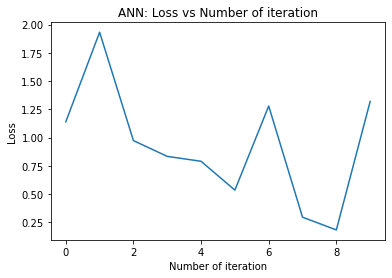

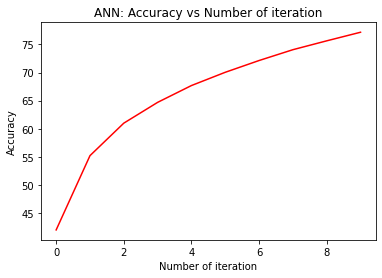

In [ ]:
# visualization loss 
plt.plot(range(num_epochs),loss_list2)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(range(num_epochs),accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        outputs = Model2(images)
        _, predictions = torch.max(outputs, 1)
        predictions = predictions.to("cpu")
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

score = 0

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    score = score + accuracy
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 74.7 %
Accuracy for class: car   is 86.2 %
Accuracy for class: bird  is 63.7 %
Accuracy for class: cat   is 46.6 %
Accuracy for class: deer  is 59.2 %
Accuracy for class: dog   is 64.3 %
Accuracy for class: frog  is 73.3 %
Accuracy for class: horse is 75.6 %
Accuracy for class: ship  is 69.5 %
Accuracy for class: truck is 65.5 %


In [ ]:
# model3

In [ ]:
# Architecture of Third Sub-Network     
#Input-->CNN1-->MP1-->MP1-->CNN4       
#Input-->CNN2-->MP2-->CNN3-->MP3-->CNN4-->MP4-->CNN5-->MP5-->FC1-->FC2-->FC3
class CNN_Model3(nn.Module): 
    def __init__(self):
        super(CNN_Model3, self).__init__()
        self.CNN1=nn.Conv2d(3,128,kernel_size=(2,2))# Input size 32*32
        self.CNN2=nn.Conv2d(3,64,kernel_size=(2,2))
        self.CNN3=nn.Conv2d(64,128,kernel_size=(2,2))
        self.CNN4=nn.Conv2d(128,256,kernel_size=(2,2))
        self.CNN5=nn.Conv2d(256,512,kernel_size=(2,2))
        self.CNN6=nn.Conv2d(512,1024,kernel_size=(2,2))
        self.MP1=nn.MaxPool2d(kernel_size=2)
        self.MP2=nn.MaxPool2d(kernel_size=2)
        self.MP3=nn.MaxPool2d(kernel_size=2)
        self.MP4=nn.MaxPool2d(kernel_size=2)
        self.MP5=nn.MaxPool2d(kernel_size=2)
        self.MP6=nn.MaxPool2d(kernel_size=2)
        self.MP7=nn.MaxPool2d(kernel_size=2)
        self.fc1=nn.Linear(1024,2048)
        self.fc2=nn.Linear(2048,512)
        self.fc3=nn.Linear(512,Num_Classes)
    def forward(self,Input):
        x1=self.CNN1(Input)
        x1=F.relu(x1)
        x2=self.MP1(x1)
        x3=self.CNN2(Input)
        x3=F.relu(x3)
        x4=self.MP1(x3)
        x2=self.MP1(x2)# To equal the size of input to CNN4 and output of CNN1
        # print(x2.shape)
        #print(x4.shape)
        x5=self.CNN3(x4)
        x5=F.relu(x5)
        #print(x5.shape)
        x6=self.MP1(x5)
        # print(x6.shape)
        x7=self.CNN4(x6+x2)# Added output of two sub-branches(CNN1 and CNN3)
        # print(x7.shape)
        x7=F.relu(x7)
        x8=self.MP1(x7)
        
        x9 = self.CNN5(x4+x8)
        x9 = F.relu(x9)
        x10 = self.MP1(x9)

        # x9=self.CNN5(x8) 
        # x9=F.relu(x9)
        # x10=self.MP1(x9)
        # x11 = self.()
        x11=torch.flatten(x10, start_dim=1)
        # print(x11.shape)
        x12=self.fc1(x11)
        x13=self.fc2(x12)
        x14=self.fc3(x13)
        return x14 


In [ ]:
Model3=CNN_Model3().to(device)

In [ ]:
Model3

CNN_Model3(
  (CNN1): Conv2d(3, 128, kernel_size=(2, 2), stride=(1, 1))
  (CNN2): Conv2d(3, 64, kernel_size=(2, 2), stride=(1, 1))
  (CNN3): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1))
  (CNN4): Conv2d(128, 256, kernel_size=(2, 2), stride=(1, 1))
  (CNN5): Conv2d(256, 512, kernel_size=(2, 2), stride=(1, 1))
  (CNN6): Conv2d(512, 1024, kernel_size=(2, 2), stride=(1, 1))
  (MP1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (MP2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (MP3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (MP4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (MP5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (MP6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (MP7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024,

In [ ]:
pytorch_total_params = sum(p.numel() for p in Model3.parameters() if p.requires_grad)
print("number of parameters/weights ", pytorch_total_params)

number of parameters/weights  5943114


In [ ]:
error = nn.CrossEntropyLoss()

In [ ]:
learning_rate = 0.003
optimizer = torch.optim.Adagrad(Model3.parameters(),lr=learning_rate)

In [ ]:
from tqdm.notebook import tqdm
#### start code here ####
num_epochs = 10
#### end code here ####\\
loss_list = []
accuracy_list = []
counter3 = 0 
for epoch in tqdm(range(num_epochs)):
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(trainloader): # 4

        #### start code here ####
        # load the dataset into device
        images = Variable(images).to(device)
        labels=Variable(labels).to(device)
        # Forward propagation 
        outputs = Model3(images)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs,labels)
        
        # Calculating gradients (1 line)
        loss.backward()
        
        # Update parameters (1 line)
        optimizer.step()
        counter3 += 1 

        # Clear gradients (1 line)
        optimizer.zero_grad()
        #### end code here ####

        # Calculate Accuracy         
        predicted = torch.max(outputs.data, 1)[1] 
        
        # Total number of label
        total += len(labels)

        # Total correct prredictions
        correct += (predicted == labels).sum().to("cpu")

    accuracy = 100 * correct / float(total)
        
    # store loss and iterates
    loss_list.append(loss.data)
    accuracy_list.append(accuracy)
    print('Counter: ')
    counter3

    print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(epoch, loss.data, accuracy))

  0%|          | 0/10 [00:00<?, ?it/s]

RuntimeError: ignored

In [ ]:
loss_list2=[]
for item in list(loss_list):
  # print(item.item())
  loss_list2.append(item.item())

In [ ]:
# visualization loss 
plt.plot(range(num_epochs),loss_list2)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(range(num_epochs),accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        outputs = Model3(images)
        _, predictions = torch.max(outputs, 1)
        predictions = predictions.to("cpu")
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

score = 0

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    score = score + accuracy
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

NameError: ignored